# 学习目标：
- 学习Pandas一些最重要的特性
- 使用Pandas 载入数据文件
- 使用Panads 从数据库中载入数据
- 使用Pandas 对数据进行探索、清洗、转换
- 数据可视化的基础知识


# 第1课：Pandas基础
- 课程目标:
    - 了解Pandas库以及在数据分析中的重要性
    - 使用Pandas的数据导入和基本操作
- 内容：
    - Pandas库的安装和导入
    - Series和DataFrame的基本操作
    - 创建Series和DataFrame
    - 访问和修改DataFrame中的数据

## 介绍Pandas
Pandas库是当今使用Python进行工作的数据科学家和分析师所使用的最重要的工具。强大的机器学习和迷人的可视化工具可能会吸引大家关注，但是，Pandas是大多数数据项目的基础。

[pandas]源自术语“panel data”，这是计量经济学中用于描述数据集的术语，这些数据集是对一些个体在多个时间段内的观察结果。——维基百科


## Pandas库的安装和导入

In [ ]:
# 使用conda install
conda install pandas

# 使用pip
pip install pandas

In [2]:
import pandas as pd
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


## Series和DataFrame的基本操作
- Series：
  Series是一种一维标签化数组，可以存储任何数据类型（整数、字符串、浮点数、Python对象等）。每个Series对象都有一个索引（Index），索引标签可以自定义，也可以是默认的整数序列。
- DataFrame
  DataFrame是一个二维的表格型数据结构，可以看作是由多个Series组成的（每个Series作为DataFrame的一列），所有Series共享一个索引（Index）。DataFrame有行索引和列索引。
  
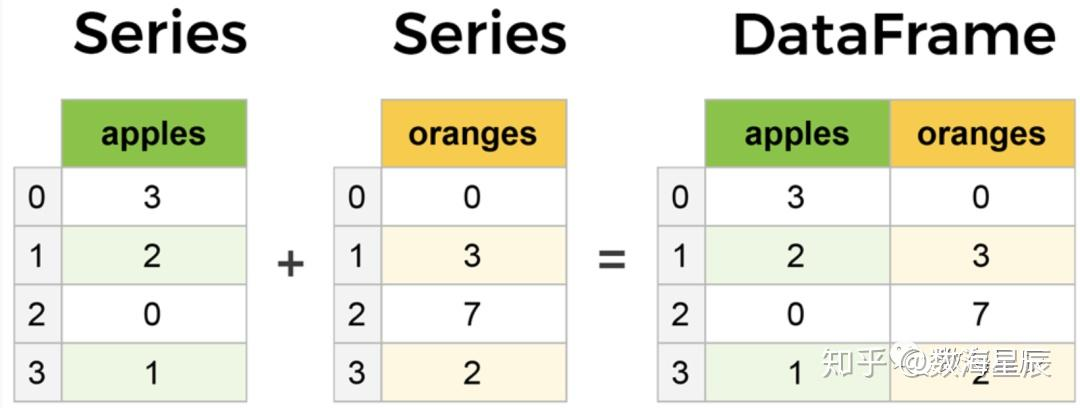

In [3]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [4]:
# 使用索引（客户名称来查找客户的订单数据）
purchases.loc["David"]

apples     1
oranges    2
Name: David, dtype: int64

在Pandas中，.loc是一个用于通过标签名访问行和列数据的方法。它允许你选择数据子集，基于行和列的标签索引。
DataFrame.loc[row_labels, column_labels]
- row_labels：行标签，可以是单个标签、标签列表或者布尔数组。
- column_labels：列标签，可以是单个标签、标签列表或者布尔数组。


In [6]:
purchases.loc["Robert","oranges"]

3

## 创建Series和DataFrame


创建Series，访问，修改等基本操作

In [14]:
import pandas as pd

# 创建一个Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

# 访问Series中的元素
print(s[0])  # 输出第一个元素

# 修改Series中的元素
s[0] = 100
print(s)

# 使用条件索引
print(s[s > 5])  # 输出所有大于5的元素

# 描述性统计
print(s.mean())  # 计算平均值
print(s.sum())   # 计算总和

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
1.0
0    100.0
1      3.0
2      5.0
3      NaN
4      6.0
5      8.0
dtype: float64
0    100.0
4      6.0
5      8.0
dtype: float64
24.4
122.0


In [8]:
import pandas as pd
import numpy as np

# 创建一个DataFrame
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 23, 34, 29],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}
df = pd.DataFrame(data)
print(df)

    Name  Age      City
0   John   28  New York
1   Anna   23     Paris
2  Peter   34    Berlin
3  Linda   29    London


## 访问和修改DataFrame中的数据

In [9]:
# 访问DataFrame中的列
print(df['Name'])  # 输出'Name'列

# 修改DataFrame中的元素
df.loc[0, 'Age'] = 30
print(df)

0     John
1     Anna
2    Peter
3    Linda
Name: Name, dtype: object
    Name  Age      City
0   John   30  New York
1   Anna   23     Paris
2  Peter   34    Berlin
3  Linda   29    London


In [10]:
# 添加新列
df['Country'] = 'USA'
print(df)

    Name  Age      City Country
0   John   30  New York     USA
1   Anna   23     Paris     USA
2  Peter   34    Berlin     USA
3  Linda   29    London     USA


In [11]:
# 删除列
df.drop('Country', axis=1, inplace=True)
print(df)


    Name  Age      City
0   John   30  New York
1   Anna   23     Paris
2  Peter   34    Berlin
3  Linda   29    London


## 查询数据

In [12]:
# 条件过滤
print(df[df['Age'] > 28])  # 输出年龄大于28的行

# 描述性统计
print(df.describe())  # 显示数值列的描述性统计信息

    Name  Age      City
0   John   30  New York
2  Peter   34    Berlin
3  Linda   29    London
             Age
count   4.000000
mean   29.000000
std     4.546061
min    23.000000
25%    27.500000
50%    29.500000
75%    31.000000
max    34.000000


`df.describe()` 是Pandas库中`DataFrame`对象的一个方法，用于快速查看数据的统计摘要。这个方法提供了一个数据集的中心趋势、离散程度和形状的描述性统计信息。默认情况下，`describe()`方法会计算以下统计量：

1. **count**：非空值的数量。
2. **mean**：平均值。
3. **std**：标准差，衡量数据的离散程度。
4. **min**：最小值。
5. **25%**：第一四分位数，即数据中有25%的值低于这个数值。
6. **50%**：中位数，即数据中有50%的值低于这个数值。
7. **75%**：第三四分位数，即数据中有75%的值低于这个数值。
8. **max**：最大值。

>用法
你可以直接调用`describe()`方法，也可以指定参数来改变输出的统计量。

```python
df.describe()
```

>参数
- `percentiles`：一个列表，指定要计算的百分位数，默认为`[.25, .5, .75]`。
- `include`：指定要包括的数据类型，可以是`'all'`、`'number'`、`'object'`或它们的组合。
- `exclude`：指定要排除的数据类型。
- `dtype`：是否包含数据类型信息。

In [15]:
import pandas as pd

# 创建一个DataFrame
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 23, 34, 29],
    'Height': [175, 165, 180, 170],  # 以厘米为单位
    'Weight': [80, 55, 85, 65]       # 以公斤为单位
}
df = pd.DataFrame(data)

# 使用describe()查看统计摘要
print(df.describe())

# 指定百分位数
print(df.describe(percentiles=[.1, .3, .5, .7, .9]))

# 只包括数值类型的列
print(df.describe(include='number'))

# 排除数值类型的列
print(df.describe(exclude='number'))

            Age      Height     Weight
count   4.00000    4.000000   4.000000
mean   28.50000  172.500000  71.250000
std     4.50925    6.454972  13.768926
min    23.00000  165.000000  55.000000
25%    26.75000  168.750000  62.500000
50%    28.50000  172.500000  72.500000
75%    30.25000  176.250000  81.250000
max    34.00000  180.000000  85.000000
            Age      Height     Weight
count   4.00000    4.000000   4.000000
mean   28.50000  172.500000  71.250000
std     4.50925    6.454972  13.768926
min    23.00000  165.000000  55.000000
10%    24.50000  166.500000  58.000000
30%    27.50000  169.500000  64.000000
50%    28.50000  172.500000  72.500000
70%    29.50000  175.500000  80.500000
90%    32.50000  178.500000  83.500000
max    34.00000  180.000000  85.000000
            Age      Height     Weight
count   4.00000    4.000000   4.000000
mean   28.50000  172.500000  71.250000
std     4.50925    6.454972  13.768926
min    23.00000  165.000000  55.000000
25%    26.75000  168.7500

# 第2课时：数据导入与导出
- **课程目标**：掌握如何将不同格式的数据导入Pandas，并导出结果。
- **内容**：
  - 从CSV、Excel、JSON等格式导入数据
  - 导出数据到CSV、Excel等格式
  - 处理导入时的常见问题（如编码问题）

## 从CSV、Excel、JSON等格式导入数据


我们使用了read_csv、read_excel和read_json函数来分别导入不同格式的文件。这些函数都返回一个DataFrame对象，你可以使用Pandas提供的各种功能来进一步处理和分析数据。

请注意，这些代码示例假设你已经有了相应的文件，并且这些文件位于你的工作目录中。在实际应用中，你可能需要提供完整的文件路径，特别是在处理不在当前工作目录中的文件时。此外，对于Excel文件，你可能需要安装openpyxl或xlrd库作为Pandas的依赖，以便能够读取.xlsx或.xls文件。JSON文件的导入则依赖于Python的json模块。

从CSV文件导入数据

In [18]:
import pandas as pd

# 从一个名为'data.csv'的CSV文件
csv_file = './data/data.csv'
# 使用read_csv函数导入CSV文件
df_csv = pd.read_csv(csv_file)

# 显示DataFrame的前几行
print(df_csv.head())

    Name  Age      City
0   John   28  New York
1   Anna   23     Paris
2  Peter   34    Berlin
3  Linda   29    London


从Excel文件导入数据

In [21]:
import pandas as pd

# 假设有一个名为'data.xlsx'的Excel文件
excel_file = './data/data.xlsx'
# 使用read_excel函数导入Excel文件
df_excel = pd.read_excel(excel_file)

# 显示DataFrame的前几行
print(df_excel.head())

    Name  Age      City
0   John   28  New York
1   Anna   23     Paris
2  Peter   34    Berlin
3  Linda   29    London


从Json文件导入数据

In [23]:
import pandas as pd

# 假设有一个名为'data.json'的JSON文件
json_file = './data/data.json'
# 使用read_json函数导入JSON文件
df_json = pd.read_json(json_file)

# 显示DataFrame的前几行
print(df_json.head())

    Name  Age      City
0   John   28  New York
1   Anna   23     Paris
2  Peter   34    Berlin
3  Linda   29    London


## 导出数据到CSV、Excel等格式

我们使用了to_csv、to_excel和to_json函数来分别导出不同格式的文件。

- to_csv函数用于导出CSV文件，默认情况下会包含行索引，可以通过设置index=False来排除行索引。
- to_excel函数用于导出Excel文件，同样默认包含行索引，可以通过设置index=False来排除。此外，to_excel函数还有其他参数可以设置，比如sheet_name来指定工作表的名称。
- to_json函数用于导出JSON文件，orient参数控制JSON的格式，'records'表示将DataFrame导出为JSON数组，每个对象代表一行。其他常用的orient参数值包括'split'、'records'、'index'和'table'。

请确保在运行这些代码之前，你的环境中已经安装了Pandas库以及导出Excel所需的openpyxl库。

导出数据到CVS文件

In [17]:
import pandas as pd

# 假设df是我们要导出的DataFrame
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 23, 34, 29],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}
df = pd.DataFrame(data)

# 导出DataFrame到CSV文件
csv_file = './data/data_out.csv'
df.to_csv(csv_file, index=False)  # index=False表示不导出行索引

print(f"Data exported to {csv_file}")

Data exported to ./data/data_out.csv


导出文件到Excel文件

In [20]:
import pandas as pd

# 导出DataFrame到Excel文件
excel_file = './data/data_out.xlsx'
df.to_excel(excel_file, index=False)  # index=False表示不导出行索引

print(f"Data exported to {excel_file}")

Data exported to ./data/data_out.xlsx


In [ ]:
导出文件到Json文件

In [24]:
import pandas as pd

# 导出DataFrame到JSON文件
json_file = './data/data_out.json'
df.to_json(json_file, orient='records')  # orient='records'表示将DataFrame导出为JSON数组

print(f"Data exported to {json_file}")

Data exported to ./data/data_out.json


## 处理导入时的常见问题（如编码问题）

在处理Pandas数据导入时，常见的问题之一是编码问题，尤其是当处理包含非ASCII字符（如中文）的数据文件时。以下是一些处理编码问题的代码示例：

从CSV文件导入时的编码问题
当读取CSV文件时，如果文件包含中文或其他非ASCII字符，而文件的编码格式与Pandas默认的UTF-8编码不同时，可能会出现编码错误。例如，如果CSV文件是用GBK编码的，可以指定encoding参数来正确读取文件：

In [28]:
import pandas as pd

# 假设CSV文件是用GBK编码的
csv_file = './data/data_gbk.csv'
df_csv = pd.read_csv(csv_file,encoding='gbk')

print(df_csv.head())

    Name  Age      City
0     张三   28  New York
1     王勇   23     Paris
2  Peter   34    Berlin
3  Linda   29    London


导出数据时的编码问题
在将DataFrame导出到CSV文件时，如果包含中文字符，为了避免乱码，可以在to_csv函数中指定encoding参数：

In [ ]:
import pandas as pd

# 假设df是要导出的DataFrame
df.to_csv('data.csv', index=False, encoding='utf_8_sig')

Python中常用的编码类型包括但不限于以下几种：

1. **UTF-8** (`utf-8`)：这是一种变长的字符编码，可以表示Unicode标准中的任何字符，是互联网上使用最广泛的编码之一。
2. **UTF-8 with BOM** (`utf-8-sig`)：UTF-8编码的一种变体，包含字节顺序标记（Byte Order Mark, BOM），用于标识文本文件是以UTF-8编码的。
3. **ASCII** (`ascii`)：只包含英文字符的编码，是最基本的字符编码，可以被所有Unicode编码兼容。
4. **ISO-8859-1** (`iso-8859-1`)：西欧语言的单字节编码。
5. **Windows-1252** (`cp-1252`)：西欧语言的单字节编码，是ISO-8859-1的一个超集，常用于Windows系统中。
6. **GBK** (`gbk`)：简体中文的双字节编码，是GB2312的扩展。
7. **GB2312** (`gb2312`)：简体中文的早期编码标准。
8. **Big5** (`big5`)：繁体中文的编码。
9. **Big5-HKSCS** (`big5-hkscs`)：香港繁体中文的编码。
10. **Shift_JIS** (`shift_jis`)：日文的编码。
11. **EUC-JP** (`euc-jp`)：日文的另一种编码。
12. **ISO-2022-JP** (`iso-2022-jp`)：日文的编码，用于电子邮件和新闻组。
13. **Korean** (`euc-kr`)：韩文的编码。
14. **Windows-1251** (`cp-1251`)：西里尔字母的编码，用于俄语等。
15. **ISO-8859-2** (`iso-8859-2`)：中欧语言的单字节编码。
16. **UTF-16** (`utf-16`)：一种变长的字符编码，用于存储Unicode字符。
17. **UTF-16 with BOM** (`utf-16-le` 或 `utf-16-be`)：UTF-16编码的两种变体，分别以小端和大端格式包含字节顺序标记。
18. **UTF-32** (`utf-32`)：一种变长的字符编码，用于存储Unicode字符。

这些编码类型可以用于在Python中处理不同语言和格式的文本文件。正确选择编码类型对于确保数据正确读取和写入至关重要。


# 第3课时：数据清洗
- **课程目标**：学习如何清洗和准备数据以进行分析。
- **内容**：
  - 处理缺失数据
  - 数据类型转换
  - 去除重复数据
  - 字符串处理

## 处理缺失数据

## 数据类型转换

## 去除重复数据

## 字符串处理

# 第4课时：数据探索与分析
- **课程目标**：掌握数据探索的基本方法，包括描述性统计和数据可视化。
- **内容**：
  - 描述性统计分析（均值、中位数、众数等）
  - 数据可视化（使用matplotlib和seaborn）
  - 相关性分析

# 第5课时：数据选择与过滤
- **课程目标**：学习如何根据条件选择和过滤数据。
- **内容**：
  - 布尔索引
  - 条件过滤
  - 使用`query`方法


# 第6课时：数据聚合与分组
- **课程目标**：掌握如何对数据进行聚合和分组操作。
- **内容**：
  - `groupby`操作
  - 聚合函数（如sum、mean、count等）
  - 透视表的创建


# 第7课时：时间序列分析
- **课程目标**：学习如何处理和分析时间序列数据。
- **内容**：
  - 时间序列数据的导入和处理
  - 时间序列的重采样
  - 时间序列的滚动统计


# 第8课时：高级功能与最佳实践
- **课程目标**：探索Pandas的高级功能，并学习最佳实践。
- **内容**：
  - 合并和连接数据集
  - 处理大数据集的技巧
  - 性能优化
  - Pandas代码的最佳实践
